## EDA : Exploratory Data Analysis
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.
____________________________________________________________________________

## Zomato EDA
Zomato is food delivery company and multinational restaurant aggregator. Zomato Food Delivery service is
available in 24 countries and more than 10,000 cities as of 2019. The major objective is to perform Exploratory
Data Analysis, Geospatial Analysis and Sentiment analysis using Zomato dataset.
_________________________________________________________________________

Importing required modules for data manipulation and visiualization 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the Zomato dataset

In [2]:
zomato = pd.read_csv("zomato.csv")
zomato.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


### - Data Cleaning 

#### - Deleting redundant columns.

Redundant columns are the columns which do not contribute in analysis of data or column in the spreadsheet table that does not contribute to the semantic meaning of the table.

Columns : url , address , reviews_list , listed_in(city) , dish_liked , phone , menu_item are redundant columns

In [3]:
zomato.drop(["url","address","phone","dish_liked","reviews_list","listed_in(city)","menu_item"],axis=1,inplace=True)

In [4]:
zomato.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet


#### - Renaming the columns.

In [5]:
zomato.rename(columns={
    "name":"Restaurant",
    "online_order":"Online service",
    "book_table":"Reservation service",
    "rate":"Rating",
    "votes":"Votes",
    "location":"Location",
    "rest_type":"Restaurant type",
    "cuisines":"Cuisines",
    "approx_cost(for two people)":"Cost for two",
    "listed_in(type)":"Category" 
},inplace=True)
zomato.head(3)

,Restaurant,Online service,Reservation service,Rating,Votes,Location,Restaurant type,Cuisines,Cost for two,Category
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet


#### - Dropping duplicates

In [6]:
zomato.duplicated(keep="first").value_counts()

False    35011
True     16706
dtype: int64

There are 16706 duplicate rows , which should be dropped

In [7]:
zomato.drop_duplicates(inplace=True)

In [8]:
zomato.duplicated().value_counts()

False    35011
dtype: int64

Thus removed all the duplicate rows from the dataframe

#### - Cleaning individual columns.

In [9]:
zomato.columns

Index(['Restaurant', 'Online service', 'Reservation service', 'Rating',
       'Votes', 'Location', 'Restaurant type', 'Cuisines', 'Cost for two',
       'Category'],
      dtype='object')

- Restaurant

In [10]:
list(zomato.Restaurant.unique())

['Jalsa',
 'Spice Elephant',
 'San Churro Cafe',
 'Addhuri Udupi Bhojana',
 'Grand Village',
 'Timepass Dinner',
 'Rosewood International Hotel - Bar & Restaurant',
 'Onesta',
 'Penthouse Cafe',
 'Smacznego',
 'CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Down The Alley',
 'Cafe Shuffle',
 'The Coffee Shack',
 'Caf-Eleven',
 'Cafe Vivacity',
 'Catch-up-ino',
 "Kirthi's Biryani",
 'T3H Cafe',
 '360 Atoms Restaurant And Cafe',
 'The Vintage Cafe',
 'Woodee Pizza',
 'Cafe Coffee Day',
 'My Tea House',
 'Hide Out Cafe',
 'CAFE NOVA',
 'Coffee Tindi',
 'Sea Green Cafe',
 'Cuppa',
 "Srinathji's Cafe",
 'Redberrys',
 'Foodiction',
 'Sweet Truth',
 'Ovenstory Pizza',
 'Faasos',
 'Behrouz Biryani',
 'Fast And Fresh',
 'Szechuan Dragon',
 'Empire Restaurant',
 'Maruthi Davangere Benne Dosa',
 'Chaatimes',
 'Havyaka Mess',
 "McDonald's",
 "Domino's Pizza",
 'Hotboxit',
 'Kitchen Garden',
 'Recipe',
 'Beijing Bites',
 'Tasty Bytes',
 'Petoo',
 'Shree Cool Point'

As we can see column "Restuarnt" contains a garbage value "CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â©", so we need to remove it

In [11]:
zomato.replace("CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â©","",regex=True,inplace=True)
list(zomato.Restaurant.unique())

['Jalsa',
 'Spice Elephant',
 'San Churro Cafe',
 'Addhuri Udupi Bhojana',
 'Grand Village',
 'Timepass Dinner',
 'Rosewood International Hotel - Bar & Restaurant',
 'Onesta',
 'Penthouse Cafe',
 'Smacznego',
 ' Down The Alley',
 'Cafe Shuffle',
 'The Coffee Shack',
 'Caf-Eleven',
 'Cafe Vivacity',
 'Catch-up-ino',
 "Kirthi's Biryani",
 'T3H Cafe',
 '360 Atoms Restaurant And Cafe',
 'The Vintage Cafe',
 'Woodee Pizza',
 'Cafe Coffee Day',
 'My Tea House',
 'Hide Out Cafe',
 'CAFE NOVA',
 'Coffee Tindi',
 'Sea Green Cafe',
 'Cuppa',
 "Srinathji's Cafe",
 'Redberrys',
 'Foodiction',
 'Sweet Truth',
 'Ovenstory Pizza',
 'Faasos',
 'Behrouz Biryani',
 'Fast And Fresh',
 'Szechuan Dragon',
 'Empire Restaurant',
 'Maruthi Davangere Benne Dosa',
 'Chaatimes',
 'Havyaka Mess',
 "McDonald's",
 "Domino's Pizza",
 'Hotboxit',
 'Kitchen Garden',
 'Recipe',
 'Beijing Bites',
 'Tasty Bytes',
 'Petoo',
 'Shree Cool Point',
 'Corner House Ice Cream',
 'Biryanis And More',
 'Roving Feast',
 'FreshMenu'

Thus we have successfully removed the garbage values from the Restaurant column

- Online Service

In [12]:
zomato["Online service"].isnull().value_counts()

False    35011
Name: Online service, dtype: int64

Online  Service column do not contain any null values

In [13]:
zomato["Online service"].value_counts()

Yes    20813
No     14198
Name: Online service, dtype: int64

Online Service column contain only two categorical values : 'Yes' and 'No' , thus we do not need to clean this column

- Reservation Service

In [14]:
zomato["Reservation service"].isnull().value_counts()

False    35011
Name: Reservation service, dtype: int64

Reservation service column do not contain any null values

In [15]:
zomato["Reservation service"].value_counts()

No     29609
Yes     5402
Name: Reservation service, dtype: int64

Reservation service column contain only two categorical values : 'Yes' and 'No' , thus we do not need to clean this column

- Rating

In [16]:
zomato["Rating"].isnull().value_counts()

False    31241
True      3770
Name: Rating, dtype: int64

Rating column contains 3770 null values , which we'll remove afterwards

In [17]:
zomato["Rating"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [18]:
list(zomato["Rating"]).count("NEW")

1258

As we can see Rating columns consists for null values,"-",1258 "NEW" values other than the required values , thus we need to clean the "NEW" and "-" values from the Rating column

Note: NEW stands for restaurants whose ratings have yet to be defined , possible reasons : Restaurant has just started functioning , Restaurant has just started catching the eyes of people , Rating system or criteria has been just introduced 

So total 1258 Restaurants fall under this type

In [19]:
zomato["Rating"].replace({"NEW|-":"0/0"},regex=True,inplace=True)

In [20]:
zomato["Rating"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '0/0', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

Here we have replaced the "NEW" values and "-" values with "0/0", since the restaurants may be newly opened , thus their rating is 0

Now we need to convert the values of Rating column in numerical format for further processing 

In [21]:
zomato["Rating"]=zomato["Rating"].apply(lambda x:float(str(x).split("/")[0]))
zomato["Rating"].head(3)

0    4.1
1    4.1
2    3.8
Name: Rating, dtype: float64

Here we gave converted the Rating values to float data type

- Votes

In [22]:
zomato.Votes.isnull().value_counts()

False    35011
Name: Votes, dtype: int64

Votes column do not contain any null values 

In [23]:
zomato.Votes.head(3)

0    775
1    787
2    918
Name: Votes, dtype: int64

The data type is already in required format so we do not need to make any changes or cleaning

- Location

In [24]:
zomato.Location.isnull().value_counts()

False    34997
True        14
Name: Location, dtype: int64

Location column consists of 14 null values which we will drop later

- Restaurant type

In [25]:
zomato["Restaurant type"].isnull().value_counts()

False    34855
True       156
Name: Restaurant type, dtype: int64

Restaurant type column consists of 156 null values which we will drop later

In [26]:
zomato["Cuisines"].isnull().value_counts()

False    34978
True        33
Name: Cuisines, dtype: int64

Cuisines column consists of 33 null values which we will drop later

- Cost for two

In [27]:
zomato['Cost for two'].isnull().value_counts()

False    34790
True       221
Name: Cost for two, dtype: int64

'Cost for two' column consists of 221 null values which we will drop later

In [28]:
zomato['Cost for two'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

Here we need to convert the values into numerical format for which we need to remove the comas from the values and then convert to floats

In [29]:
zomato["Cost for two"]=zomato['Cost for two'].apply(lambda x:float("".join(str(x).split(","))))
zomato["Cost for two"].head(3)

0    800.0
1    800.0
2    800.0
Name: Cost for two, dtype: float64

Here we gave converted the "Cost for two" values to required format and float data type

- Category

In [30]:
zomato.Category.isnull().value_counts()

False    35011
Name: Category, dtype: int64

Online Service column do not contain any null values

In [31]:
zomato.Category.value_counts()

Delivery              16169
Dine-out              12929
Desserts               2476
Cafes                  1249
Drinks & nightlife      909
Buffet                  674
Pubs and bars           605
Name: Category, dtype: int64

Category columns are in required categorical format does we do not need to make any changes in the column

#### - Removing NaN values from the dataset

In [32]:
print(zomato.isnull().sum())
print("\nTotal null values : ",zomato.isnull().sum().sum())

Restaurant                0
Online service            0
Reservation service       0
Rating                 3770
Votes                     0
Location                 14
Restaurant type         156
Cuisines                 33
Cost for two            221
Category                  0
dtype: int64

Total null values :  4194


Here columns Rating,Location,Restaurant type,Cuisines,Cost for two contain null values , all together there are 4194 null values which we need to drop

In [33]:
zomato=zomato.dropna()

In [34]:
zomato.isnull().sum()

Restaurant             0
Online service         0
Reservation service    0
Rating                 0
Votes                  0
Location               0
Restaurant type        0
Cuisines               0
Cost for two           0
Category               0
dtype: int64

Here we have successfully dropped all the null columns from the dataset

#### - Some more transformations

Depending upon the cost for two people we will classify the restaurants in categories like Very low, Low, Moderate, High ,Very high

In [35]:
print("Minimum cost : ",zomato["Cost for two"].min(),"\nMaximum cost : ",zomato["Cost for two"].max())

Minimum cost :  40.0 
Maximum cost :  6000.0


In [36]:
np.linspace(40,6000,5)

array([  40., 1530., 3020., 4510., 6000.])

Criteria for splitting in the above cell

In [37]:
zomato["Price level"]="x"
zomato.loc[(zomato["Cost for two"]>=40)&(zomato["Cost for two"]<=1530),"Price level"]="Low"
zomato.loc[(zomato["Cost for two"]>1530)&(zomato["Cost for two"]<=3020),"Price level"]="Moderate"
zomato.loc[(zomato["Cost for two"]>3020)&(zomato["Cost for two"]<=4510),"Price level"]="High"
zomato.loc[(zomato["Cost for two"]>4510),"Price level"]="Very high"
zomato["Price level"].value_counts()

Low          29526
Moderate      1370
High            59
Very high        3
Name: Price level, dtype: int64

### - Data Visualization 

In [38]:
zomato.head(4)

,Restaurant,Online service,Reservation service,Rating,Votes,Location,Restaurant type,Cuisines,Cost for two,Category,Price level
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Low
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Low
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Low
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Low


<AxesSubplot:xlabel='Online service', ylabel='count'>

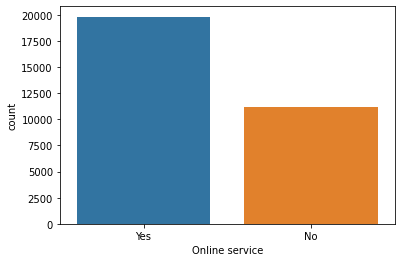

In [39]:
sns.countplot(x="Online service",data=zomato)

Here we can infer that the number of restaurants providing online service is more than that of restaurants which do not, with the digitalization of society it is obvious that most of the businesses have adapted digital means for business.  

There still exists restaurants who do not offer online services, reasons may be financial, geographical, lack of facilities, etc. 

<AxesSubplot:xlabel='Online service', ylabel='Rating'>

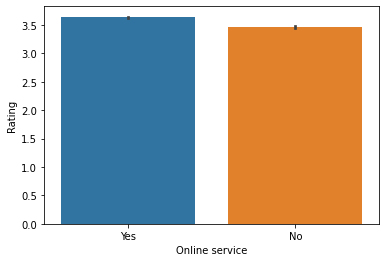

In [40]:
sns.barplot(x='Online service',y="Rating",data=zomato)

Here we can infer that Rating of the restaurtants who offer online services have higher ratings as compared to restaurants which do not 

<AxesSubplot:xlabel='Reservation service', ylabel='count'>

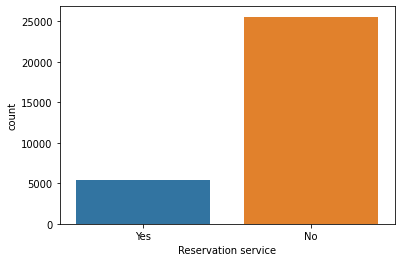

In [41]:
sns.countplot(x="Reservation service",data=zomato)

Here we can infer that hotels providing reservation services are lesser in number as compared to those which do not

<AxesSubplot:xlabel='Reservation service', ylabel='Rating'>

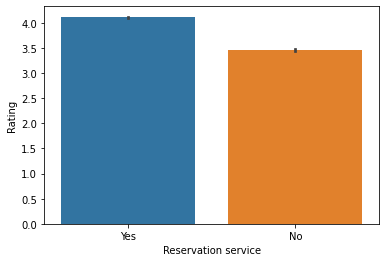

In [42]:
sns.barplot(x="Reservation service",y="Rating",data=zomato)

Here we can infer that hotels providing reservation services have higher ratings than the hotels which do not.

<AxesSubplot:xlabel='Location'>

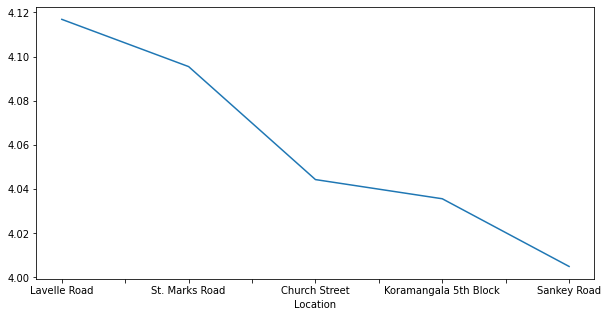

In [43]:
(zomato.groupby(["Location"])['Rating'].mean()).nlargest(5).plot(kind="line",figsize=(10,5))

Here we can infer that location "Lavelle Road" is the best location for providing food service

<AxesSubplot:xlabel='Location'>

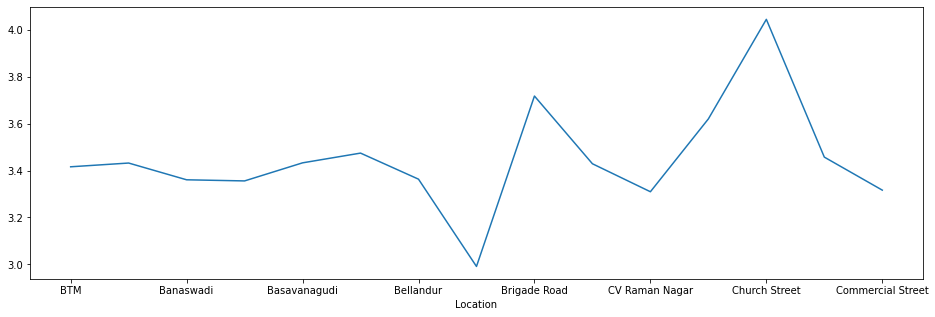

In [44]:
a = zomato.groupby("Location")["Rating"].mean().head(15)
a.plot(kind="line",figsize=(16,5))

Here we can infer that Restaurants at locations BTM, Banaswadi, Basavanagudi, Belandur, CV Raman Nagar, Commmercail Street have near about similar ratings in the range of 3.3 to 3.5 and Church Street has the highest rating followed by Brigade road.

<AxesSubplot:xlabel='count', ylabel='Category'>

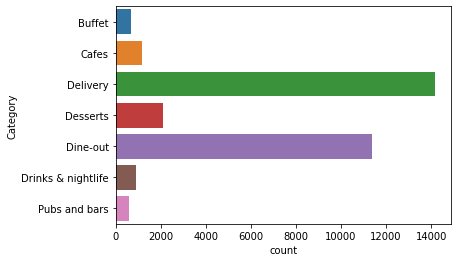

In [45]:
sns.countplot(y="Category",data=zomato)

Here we can infer that restaurants of delivery category are abundant followed by Dine-out and lowest being the buffet and Pubs

<AxesSubplot:xlabel='Restaurant type'>

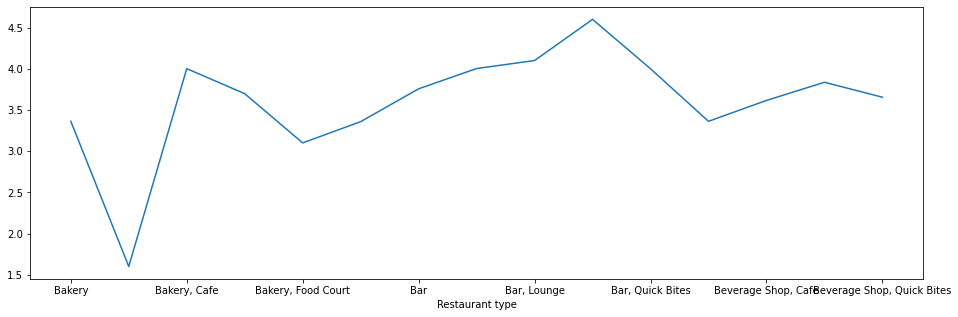

In [46]:
(zomato.groupby("Restaurant type")["Rating"].mean().head(15)).plot(kind="line",figsize=(16,5))

<AxesSubplot:xlabel='Cost for two', ylabel='Restaurant'>

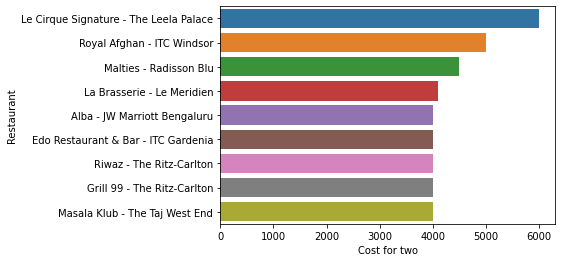

In [47]:
sns.barplot(x="Cost for two",y="Restaurant",data=zomato[["Restaurant","Cost for two"]].nlargest(15,"Cost for two"))

Here we can infer that Le Cirque Signature-The Leela Palace is the costliest restaurants followed by Royal Afghan-ITC Windsor

<AxesSubplot:ylabel='Location'>

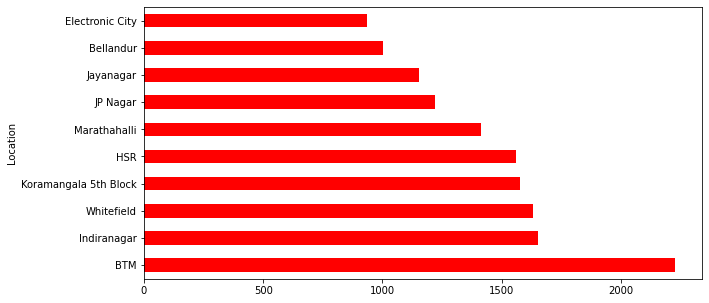

In [48]:
(zomato.groupby("Location")["Location"].count().nlargest(10)).plot(kind="barh",color="red",figsize=(10,5))

Here we can infer that the location BTM consists maximum number of restaurants followed by Indiranagar

<AxesSubplot:>

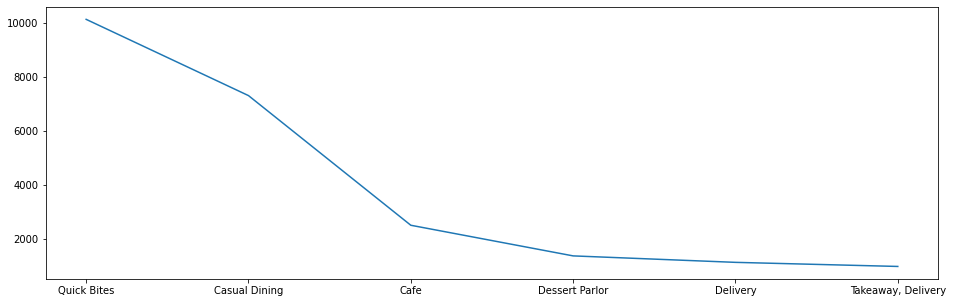

In [49]:
(zomato["Restaurant type"].value_counts().head(6)).plot(kind="line",figsize=(16,5))

Here we can infer that restaurants of type Quick bites are abundant followed by casual dining

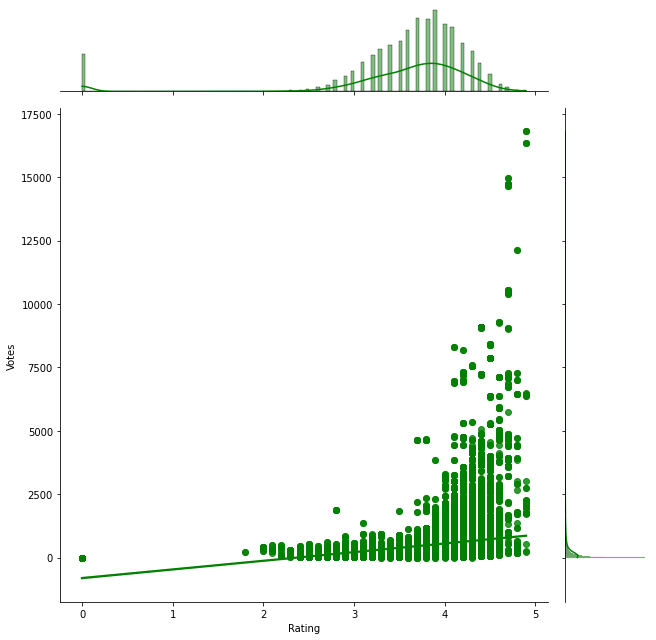

In [50]:
sns.jointplot(x="Rating",y="Votes",data=zomato,kind="reg",color="green",height=9)

Here we can infer that votes are directly proportional to rating and vice-versa , votes increase as rating increases as well as restaurants having rating between 4 to 5 recieve wide range of votes, dominant being the range 0 to 5000.

<AxesSubplot:xlabel='Price level', ylabel='count'>

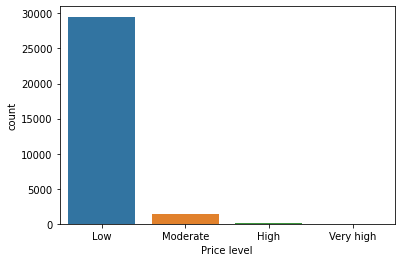

In [51]:
sns.countplot(x="Price level",data=zomato)

Here we can infer that restaurants with low prices are abundant whereas there are very less number of costly restaurants

<AxesSubplot:xlabel='Price level', ylabel='Votes'>

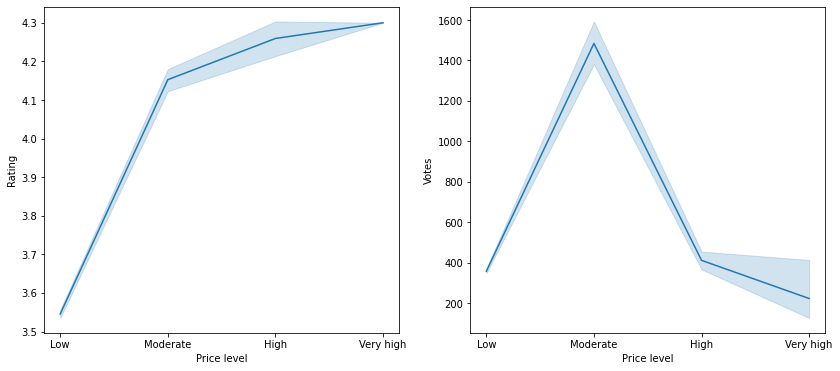

In [83]:
plt.figure(figsize=(14,6))
sns.lineplot(x="Price level",y="Rating",data=zomato,ax=plt.subplot(1,2,1))
sns.lineplot(x="Price level",y="Votes",data=zomato,ax=plt.subplot(1,2,2))

Here we can infer that as price of restaurants increase , ratings increase as well also restaurants with moderate price range recieve maximum votes and restaurants with high price range recieve less votes, There might be multiple reasons for that
- Since the number of costly reastaurants is less , people going there are going to be less and there are high chances of those people to give a good feedback thus keeping the rating high coz of few people who rated them good
- Restaurants might be worth the money , most of the people went there rated them well.
- Restaurants with low pricing serve a lot of people , thus is rated by large number of people, here ratings may vary from 1 to 5 depending upon the customer satisfaction.


## Conclusions

#### 1.) 1258 restaurants have been newly developed 

#### 2.) For restaurants to increase their profit rate , they need to provide online servies as well as table reservation services to the customers

#### 3.) Delivery service is one of the major services to gain the attention of customers, thus restaurants need to provide delivery service 

In [113]:
datadf = (zomato.groupby(["Category","Price level"])["Rating"].mean()).unstack()
# sns.barplot(x="datadf.values",y="datadf.columns",data=datadf,hue=datadf.index)
datadf

Price level,High,Low,Moderate,Very high
Category,,,,
Buffet,4.250000,3.895010,4.191667,NaN
Cafes,NaN,3.745579,4.115789,NaN
Delivery,NaN,3.501410,4.243455,NaN
Desserts,NaN,3.634950,4.185714,NaN
Dine-out,4.262791,3.506152,4.168521,4.3
Drinks & nightlife,4.250000,3.956192,4.093033,NaN
Pubs and bars,4.250000,3.914009,3.992308,NaN


In [138]:
# sns.barplot(data=datadf,x=datadf.index)
# datadf
s=(zomato.groupby(["Category","Price level"])["Rating"].mean())
s=pd.DataFrame(s).reset_index()
# s['Category']
s

,Category,Price level,Rating
0,Buffet,High,4.250000
1,Buffet,Low,3.895010
2,Buffet,Moderate,4.191667
3,Cafes,Low,3.745579
4,Cafes,Moderate,4.115789
5,Delivery,Low,3.501410
6,Delivery,Moderate,4.243455
7,Desserts,Low,3.634950
8,Desserts,Moderate,4.185714
9,Dine-out,High,4.262791


<AxesSubplot:xlabel='Category', ylabel='Rating'>

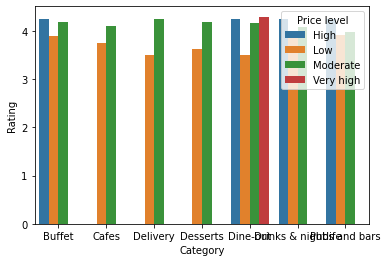

In [140]:
sns.barplot(data=s,x='Category',y='Rating',hue='Price level')